# **Planilhas Excel**

In [ ]:
import pandas as pd

In [99]:
#upload
from google.colab import files
arq = files.upload()

Saving Natal.xlsx to Natal (1).xlsx
Saving Recife.xlsx to Recife (1).xlsx
Saving Salvador.xlsx to Salvador (1).xlsx


In [ ]:
#Lendo os arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
#juntando os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Vendo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#Consultando valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo valores nulos por 0
df["Vendas"].fillna(0,inplace=True)

In [ ]:
#Apagando as linhas com valores nulos
#df.dropna(inplace=True)

In [ ]:
#Criando coluna receita
#df["Receita"] = df["Vendas"].mul(df["Qtde"])
df["Receita"] = df["Vendas"]*df["Qtde"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#maior receita
df["Receita"].max()

3544.0

In [ ]:
#menor receita
df["Receita"].min()

3.34

In [ ]:
#ranking maiores receitas
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
#ranking menores receitas
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
#ordenando por loja
df.sort_values("LojaID",ascending=True).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
8,Natal,2019-03-27,667.0,852,4,2668.0
37,Natal,2018-10-03,726.0,852,2,1452.0
79,Natal,2019-02-28,557.0,852,4,2228.0
41,Natal,2018-05-20,835.0,852,4,3340.0
44,Natal,2019-01-03,500.0,852,4,2000.0
45,Natal,2019-03-11,431.0,852,3,1293.0
48,Natal,2018-09-20,676.0,852,4,2704.0
49,Natal,2019-04-01,831.0,852,2,1662.0
51,Natal,2018-01-21,859.0,852,4,3436.0
35,Natal,2018-01-18,552.0,852,2,1104.0


# Utilizando as Datas

In [ ]:
#GroupBy por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criar coluna ano
df["Ano"] = df["Data"].dt.year

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018


In [ ]:
#data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Diferença de dias para a data mais antiga
df["DiferencaDias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,DiferencaDias
166,Natal,2019-01-02,111.72,1035,3,335.16,2019,366 days
169,Natal,2019-01-02,166.73,1037,2,333.46,2019,366 days
48,Fortaleza,2019-01-01,40.71,1002,6,244.26,2019,365 days
89,Natal,2019-01-02,17.46,1034,1,17.46,2019,366 days
16,Recife,2019-01-01,19.95,980,8,159.60,2019,365 days


In [ ]:
#Criando a coluna trimestre
df["Trimestre"]= df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,DiferencaDias,Trimestre
5,Natal,2019-03-30,674.00,854,2,1348.00,2019,453 days,1
126,Aracaju,2018-01-01,13.41,1520,7,93.87,2018,0 days,1
117,Recife,2019-03-02,15.42,983,8,123.36,2019,425 days,1
229,Natal,2019-01-02,43.08,1036,2,86.16,2019,366 days,1
194,Natal,2019-01-02,156.47,1035,1,156.47,2019,366 days,1


In [ ]:
#Filtrando as vendas de 2019 no mês de Junho
df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,DiferencaDias,Trimestre
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,425 days,1
...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,425 days,1


# Visualização de Dados

In [ ]:
#Vendas por loja
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

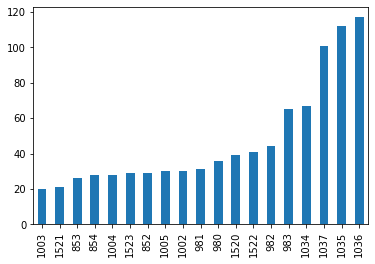

In [ ]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=True).plot.bar()

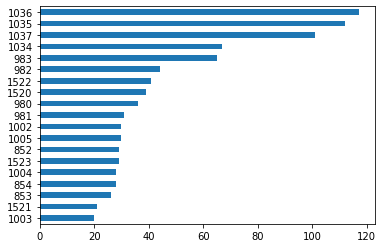

In [ ]:
#Barras Horizontais
df["LojaID"].value_counts(ascending=True).plot.barh()

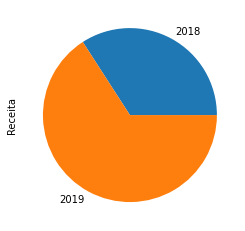

In [ ]:
#Gráfico de Pizza Receita por Ano
df.groupby(df['Ano'])['Receita'].sum().plot.pie()

In [ ]:
#Vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [ ]:
#Colocando titulo e definindo nome aos eixos
import matplotlib.pyplot as plt

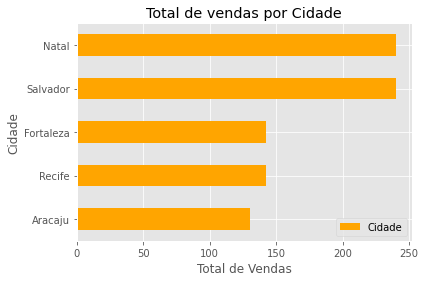

In [ ]:
#Vendas por Cidade
plt.style.use("ggplot")

df["Cidade"].value_counts(ascending=True).plot.barh(title="Total de vendas por Cidade", color="orange")
plt.xlabel("Total de Vendas")
plt.ylabel("Cidade")
plt.legend() 

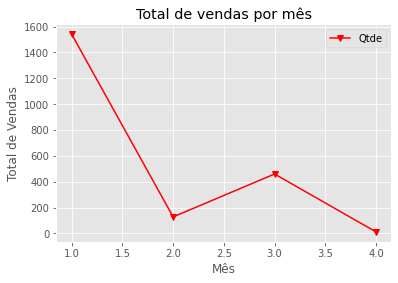

In [ ]:
#Vendas por mes em 2019
df_2019 = df[df["Ano"] == 2019]
df_2019.groupby(df_2019["Data"].dt.month)["Qtde"].sum().plot(marker = "v", title="Total de vendas por mês", color="red")
plt.xlabel("Mês")
plt.ylabel("Total de Vendas")
plt.legend();

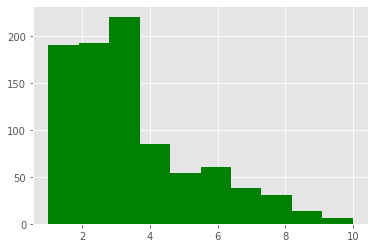

In [ ]:
#Histograma
plt.hist(df["Qtde"],color='green');

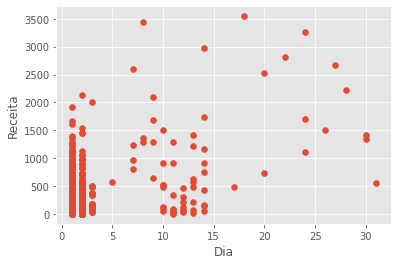

In [ ]:
#Gráfico de dispersão
plt.scatter(x=df_2019["Data"].dt.day, y=df_2019["Receita"]);
plt.xlabel("Dia")
plt.ylabel("Receita");
